# Sistema de Rotas da Bósnia e Herzegovina usando Grafos

## Cidades no Sistema:

- Sarajevo (ID: 0)

- Banja Luka (ID: 1)

- Mostar (ID: 2)

- Tuzla (ID: 3)

- Zenica (ID: 4)

- Bihać (ID: 5)

- Trebinje (ID: 6)

- Brčko (ID: 7)

- Doboj (ID: 8)

- Bijeljina (ID: 9)

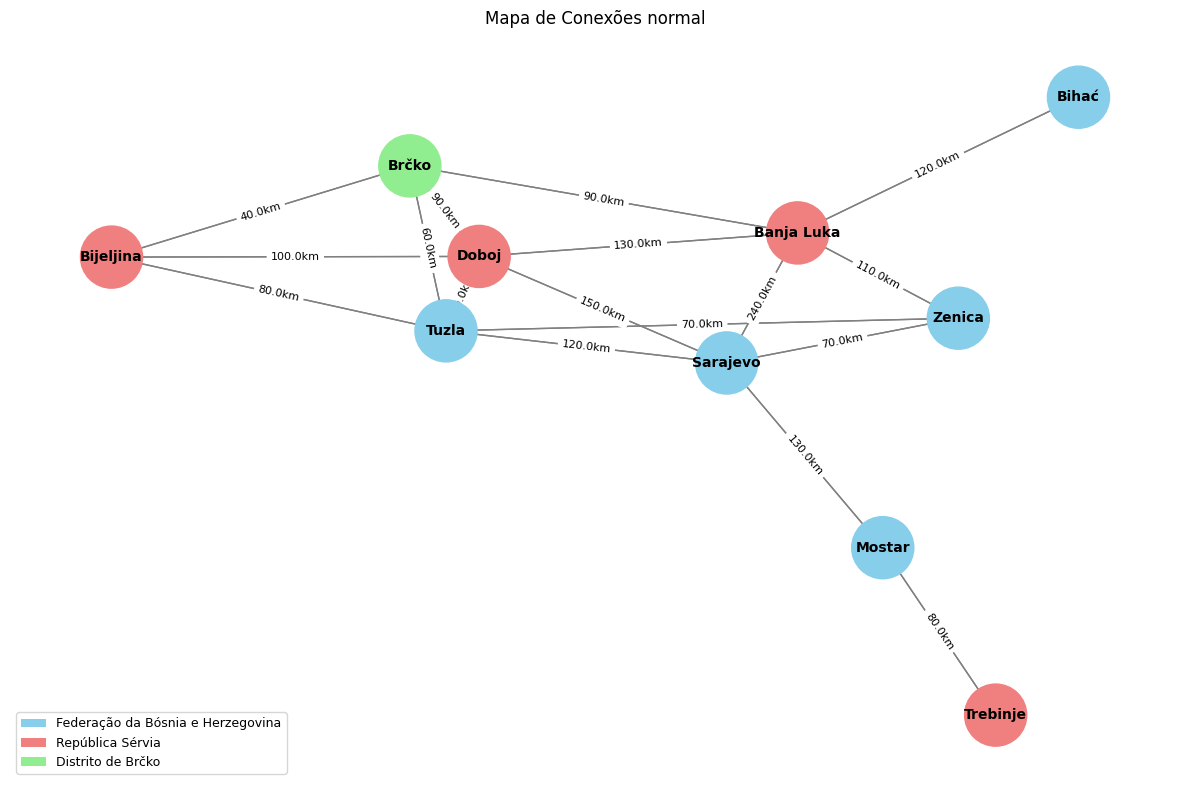

### Matriz de Adjacência (Distâncias em km)

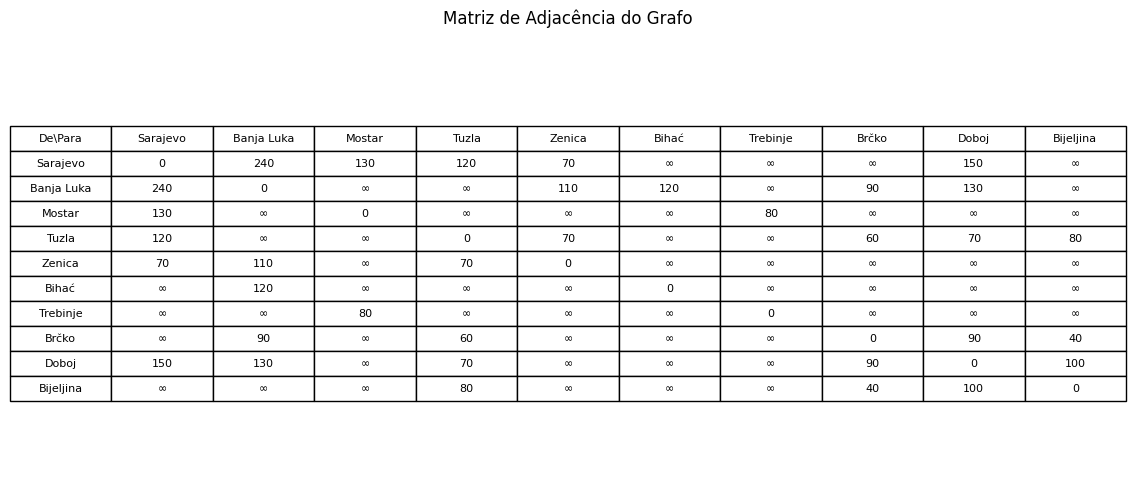

## Aplicando Algoritmo de Floyd-Warshall

### Matriz de Distâncias Mínimas (Floyd-Warshall)

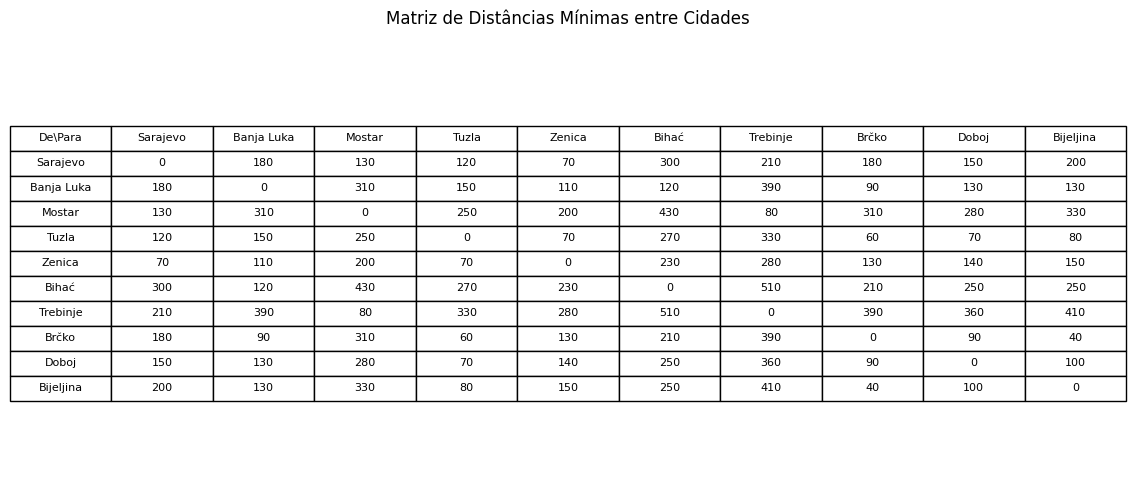

### Amostra de alguns Caminhos Mínimos

**Sarajevo → Bihać**: Sarajevo → Zenica → Banja Luka → Bihać (Distância: 300 km)

**Mostar → Brčko**: Mostar → Sarajevo → Tuzla → Brčko (Distância: 310 km)

**Bihać → Trebinje**: Bihać → Banja Luka → Zenica → Sarajevo → Mostar → Trebinje (Distância: 510 km)

**Banja Luka → Tuzla**: Banja Luka → Brčko → Tuzla (Distância: 150 km)

## Análise de Conectividade do Grafo

- **Grafo fortemente conexo**: True

### Graus dos Vértices:

- Sarajevo: Grau de saída = 5, Grau de entrada = 5

- Banja Luka: Grau de saída = 5, Grau de entrada = 5

- Mostar: Grau de saída = 2, Grau de entrada = 2

- Tuzla: Grau de saída = 5, Grau de entrada = 5

- Zenica: Grau de saída = 3, Grau de entrada = 3

- Bihać: Grau de saída = 1, Grau de entrada = 1

- Trebinje: Grau de saída = 1, Grau de entrada = 1

- Brčko: Grau de saída = 4, Grau de entrada = 4

- Doboj: Grau de saída = 5, Grau de entrada = 5

- Bijeljina: Grau de saída = 3, Grau de entrada = 3

- **Centro do grafo (menor excentricidade)**: Zenica (excentricidade: 280 km)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Patch
import networkx as nx
from IPython.display import display, Markdown

class GrafoBosnia:
    def __init__(self):
        self.cidades = {
            0: "Sarajevo",
            1: "Banja Luka", 
            2: "Mostar",
            3: "Tuzla",
            4: "Zenica",
            5: "Bihać",
            6: "Trebinje",
            7: "Brčko",
            8: "Doboj",
            9: "Bijeljina"
        }
        
        self.num_vertices = len(self.cidades)
        self.matriz_adj = np.full((self.num_vertices, self.num_vertices), np.inf)
        
        np.fill_diagonal(self.matriz_adj, 0)
        
        self._definir_arestas()
        
        self.matriz_pred = None
        self._inicializar_matriz_pred()
        
    def _definir_arestas(self):
        # Sarajevo para outras cidades
        self.matriz_adj[0][1] = 240  # Sarajevo -> Banja Luka
        self.matriz_adj[0][2] = 130  # Sarajevo -> Mostar
        self.matriz_adj[0][3] = 120  # Sarajevo -> Tuzla
        self.matriz_adj[0][4] = 70   # Sarajevo -> Zenica
        
        # Banja Luka para outras cidades
        self.matriz_adj[1][0] = 240  # Banja Luka -> Sarajevo
        self.matriz_adj[1][4] = 110  # Banja Luka -> Zenica
        self.matriz_adj[1][5] = 120  # Banja Luka -> Bihać
        self.matriz_adj[1][7] = 90   # Banja Luka -> Brčko
        
        # Mostar para outras cidades
        self.matriz_adj[2][0] = 130  # Mostar -> Sarajevo
        self.matriz_adj[2][6] = 80   # Mostar -> Trebinje
        
        # Tuzla para outras cidades
        self.matriz_adj[3][0] = 120  # Tuzla -> Sarajevo
        self.matriz_adj[3][4] = 70   # Tuzla -> Zenica
        self.matriz_adj[3][7] = 60   # Tuzla -> Brčko
        
        # Zenica para outras cidades
        self.matriz_adj[4][0] = 70   # Zenica -> Sarajevo
        self.matriz_adj[4][1] = 110  # Zenica -> Banja Luka
        self.matriz_adj[4][3] = 70   # Zenica -> Tuzla
        
        # Bihać para outras cidades
        self.matriz_adj[5][1] = 120  # Bihać -> Banja Luka
        
        # Trebinje para outras cidades
        self.matriz_adj[6][2] = 80   # Trebinje -> Mostar
        
        # Brčko para outras cidades
        self.matriz_adj[7][1] = 90   # Brčko -> Banja Luka
        self.matriz_adj[7][3] = 60   # Brčko -> Tuzla

        # Doboj para outras cidades
        self.matriz_adj[8][0] = 150  # Doboj -> Sarajevo
        self.matriz_adj[8][1] = 130  # Doboj -> Banja Luka
        self.matriz_adj[8][3] = 70   # Doboj -> Tuzla
        self.matriz_adj[8][7] = 90   # Doboj -> Brčko

        # Ligações de volta para Doboj
        self.matriz_adj[0][8] = 150
        self.matriz_adj[1][8] = 130
        self.matriz_adj[3][8] = 70
        self.matriz_adj[7][8] = 90

        # Bijeljina para outras cidades
        self.matriz_adj[9][3] = 80   # Bijeljina -> Tuzla
        self.matriz_adj[9][7] = 40   # Bijeljina -> Brčko
        self.matriz_adj[9][8] = 100  # Bijeljina -> Doboj

        # Ligações de volta para Bijeljina
        self.matriz_adj[3][9] = 80
        self.matriz_adj[7][9] = 40
        self.matriz_adj[8][9] = 100
        
    def _inicializar_matriz_pred(self):
        self.matriz_pred = np.full((self.num_vertices, self.num_vertices), -1)
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j and self.matriz_adj[i][j] != np.inf:
                    self.matriz_pred[i][j] = i
    
    def floyd_warshall(self):
        dist = self.matriz_adj.copy()
        pred = self.matriz_pred.copy()
        
        for k in range(self.num_vertices):
            for i in range(self.num_vertices):
                for j in range(self.num_vertices):
                    if dist[i][j] > dist[i][k] + dist[k][j]:
                        dist[i][j] = dist[i][k] + dist[k][j]
                        pred[i][j] = pred[k][j]
        
        return dist, pred
    
    def obter_caminho(self, origem, destino, pred)
        if pred[origem][destino] == -1:
            return []
        
        caminho = [destino]
        while destino != origem:
            destino = pred[origem][destino]
            caminho.append(destino)
        
        return list(reversed(caminho))
    
    def visualizar_grafo(self, layout="spring"):
        G = nx.DiGraph()
    
        for idx, cidade in self.cidades.items():
            G.add_node(cidade)
    
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if self.matriz_adj[i][j] != np.inf and i != j:
                    G.add_edge(self.cidades[i], self.cidades[j], 
                          weight=self.matriz_adj[i][j])
    
        entidades = {
            "Sarajevo": "FBiH",
            "Mostar": "FBiH",
            "Tuzla": "FBiH",
            "Zenica": "FBiH",
            "Bihać": "FBiH",
            "Banja Luka": "RS",
            "Trebinje": "RS",
            "Brčko": "Brčko",
            "Doboj": "RS",
            "Bijeljina": "RS"
        }
    
        cores = []
        for cidade in G.nodes:
            if entidades[cidade] == "FBiH":
                cores.append("skyblue")
            elif entidades[cidade] == "RS":
                cores.append("lightcoral")
            else:
                cores.append("lightgreen")
    
        if layout == "real":
            pos = {
                "Sarajevo": (18.4131, 43.8563),
                "Banja Luka": (17.1910, 44.7722),
                "Mostar": (17.8078, 43.3438),
                "Tuzla": (18.6730, 44.5372),
                "Zenica": (17.9078, 44.2039),
                "Bihać": (15.8700, 44.8169),
                "Trebinje": (18.3436, 42.7110),
                "Brčko": (18.8083, 44.8720),
                "Doboj": (18.0833, 44.7333),
                "Bijeljina": (19.2167, 44.7500)
            }
        else:
            pos = nx.spring_layout(G, seed=42)
    
        plt.figure(figsize=(12, 8))
        nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=cores)
        nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)
        nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
        edge_labels = {(u, v): f"{d['weight']}km" for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    
        titulo = "Mapa de Conexões (Cartograficamente correto)" if layout == "real" \
                else "Mapa de Conexões normal"
        plt.title(titulo)
        plt.axis('off')
        plt.tight_layout()

        legenda = [
            Patch(facecolor="skyblue", label="Federação da Bósnia e Herzegovina"),
            Patch(facecolor="lightcoral", label="República Sérvia"),
            Patch(facecolor="lightgreen", label="Distrito de Brčko")
        ]
        plt.legend(handles=legenda, loc="lower left", fontsize=9)

        plt.show()

    
    def mostrar_matriz_adjacencia(self):
        display(Markdown("### Matriz de Adjacência (Distâncias em km)"))
        
        header = ["De\\Para"] + [self.cidades[i][:10] for i in range(self.num_vertices)]
        rows = []
        
        for i in range(self.num_vertices):
            row = [self.cidades[i][:10]]
            for j in range(self.num_vertices):
                if self.matriz_adj[i][j] == np.inf:
                    row.append("∞")
                elif i == j:
                    row.append("0")
                else:
                    row.append(str(int(self.matriz_adj[i][j])))
            rows.append(row)
        
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.axis('tight')
        ax.axis('off')
        table = ax.table(cellText=rows, colLabels=header, loc='center', cellLoc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(8)
        table.scale(1.2, 1.5)
        plt.title("Matriz de Adjacência do Grafo")
        plt.show()

grafo_bosnia = GrafoBosnia()

display(Markdown("# Sistema de Rotas da Bósnia e Herzegovina usando Grafos"))
display(Markdown("## Cidades no Sistema:"))
for idx, cidade in grafo_bosnia.cidades.items():
    display(Markdown(f"- {cidade} (ID: {idx})"))

grafo_bosnia.visualizar_grafo()

grafo_bosnia.mostrar_matriz_adjacencia()

display(Markdown("## Aplicando Algoritmo de Floyd-Warshall"))
distancias, predecessores = grafo_bosnia.floyd_warshall()

display(Markdown("### Matriz de Distâncias Mínimas (Floyd-Warshall)"))
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

header = ["De\\Para"] + [grafo_bosnia.cidades[i][:10] for i in range(grafo_bosnia.num_vertices)]
rows = []

for i in range(grafo_bosnia.num_vertices):
    row = [grafo_bosnia.cidades[i][:10]]
    for j in range(grafo_bosnia.num_vertices):
        if distancias[i][j] == np.inf:
            row.append("∞")
        else:
            row.append(str(int(distancias[i][j])))
    rows.append(row)

table = ax.table(cellText=rows, colLabels=header, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.5)
plt.title("Matriz de Distâncias Mínimas entre Cidades")
plt.show()

display(Markdown("### Amostra de alguns Caminhos Mínimos"))

exemplos = [
    (0, 5),
    (2, 7),
    (5, 6),
    (1, 3)
]

for origem, destino in exemplos:
    caminho_ids = grafo_bosnia.obter_caminho(origem, destino, predecessores)
    caminho_nomes = [grafo_bosnia.cidades[id] for id in caminho_ids]
    distancia = distancias[origem][destino]
    
    display(Markdown(
        f"**{grafo_bosnia.cidades[origem]} → {grafo_bosnia.cidades[destino]}**: "
        f"{' → '.join(caminho_nomes)} "
        f"(Distância: {int(distancia)} km)"
    ))

display(Markdown("## Análise de Conectividade do Grafo"))

fortemente_conexo = True
for i in range(grafo_bosnia.num_vertices):
    for j in range(grafo_bosnia.num_vertices):
        if distancias[i][j] == np.inf:
            fortemente_conexo = False
            break

display(Markdown(f"- **Grafo fortemente conexo**: {fortemente_conexo}"))

graus_saida = np.sum(grafo_bosnia.matriz_adj != np.inf, axis=1) - 1
graus_entrada = np.sum(grafo_bosnia.matriz_adj != np.inf, axis=0) - 1

display(Markdown("### Graus dos Vértices:"))
for i in range(grafo_bosnia.num_vertices):
    display(Markdown(
        f"- {grafo_bosnia.cidades[i]}: "
        f"Grau de saída = {graus_saida[i]}, "
        f"Grau de entrada = {graus_entrada[i]}"
    ))

excentricidades = np.max(distancias, axis=1)
excentricidades[excentricidades == np.inf] = 10000
centro_id = np.argmin(excentricidades)

display(Markdown(
    f"- **Centro do grafo (menor excentricidade)**: "
    f"{grafo_bosnia.cidades[centro_id]} "
    f"(excentricidade: {int(excentricidades[centro_id])} km)"
))

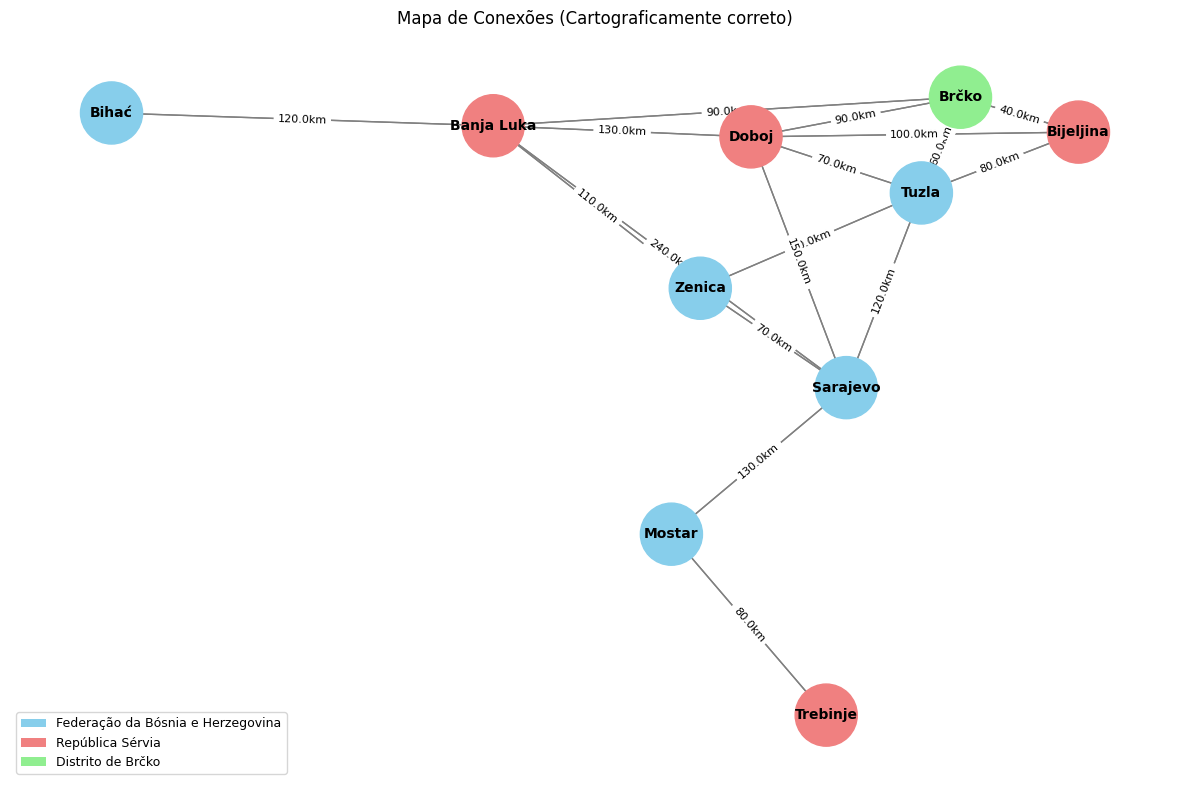

In [2]:
grafo_bosnia.visualizar_grafo(layout="real")